<a href="https://colab.research.google.com/github/xinxinxu2025/code_memo/blob/main/Python%E5%AE%9F%E8%B7%B5%E3%82%AC%E3%82%A4%E3%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 小売店のデータを模擬した練習用DataFrameを作成します。


In [1]:
# バージョン管理（最初に必ず確認）
import pandas as pd
print(f"Pandas version: {pd.__version__}")

# 再現性の確保（乱数のシード設定）
import numpy as np
np.random.seed(42)  # 結果を再現可能にする

Pandas version: 2.2.2


In [2]:
import os

# 現在の作業ディレクトリ
print("Current working directory:", os.getcwd())

# ファイル一覧の表示
print("Files in current directory:", os.listdir('.'))

Current working directory: /content
Files in current directory: ['.config', 'sample_data']


In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# 乱数のシードを設定（再現性のため）
np.random.seed(42)
random.seed(42)

# データサイズの設定
n_rows = 1000

# 基本データの生成
dates = [datetime(2023, 1, 1) + timedelta(days=i) for i in range(n_rows)]
store_ids = [f'Store_{i:03d}' for i in range(1, 11)]
product_categories = ['Electronics', 'Clothing', 'Food', 'Books', 'Home']
regions = ['Tokyo', 'Osaka', 'Nagoya', 'Fukuoka', 'Sapporo']
payment_methods = ['Credit Card', 'Cash', 'E-money', 'QR Code']

# 売上データの生成
data = {
    'order_id': [f'ORD_{i:05d}' for i in range(1, n_rows + 1)],
    'order_date': dates,
    'store_id': np.random.choice(store_ids, n_rows),
    'product_category': np.random.choice(product_categories, n_rows, p=[0.2, 0.3, 0.25, 0.1, 0.15]),
    'product_name': [],
    'quantity': np.random.randint(1, 11, n_rows),
    'unit_price': [],
    'total_sales': [],
    'customer_id': [f'CUST_{np.random.randint(1000, 9999)}' for _ in range(n_rows)],
    'customer_age': np.random.randint(18, 80, n_rows),
    'customer_gender': np.random.choice(['Male', 'Female', 'Other'], n_rows, p=[0.45, 0.45, 0.1]),
    'region': np.random.choice(regions, n_rows),
    'payment_method': np.random.choice(payment_methods, n_rows, p=[0.4, 0.3, 0.2, 0.1]),
    'discount_rate': np.random.choice([0, 0.1, 0.2, 0.3], n_rows, p=[0.6, 0.2, 0.15, 0.05]),
    'return_flag': np.random.choice([0, 1], n_rows, p=[0.9, 0.1]),
    'rating': np.random.choice([1, 2, 3, 4, 5, np.nan], n_rows, p=[0.05, 0.1, 0.15, 0.3, 0.3, 0.1])
}

# 商品名と単価の設定（カテゴリごとに異なる）
category_prices = {
    'Electronics': (5000, 200000),
    'Clothing': (1000, 15000),
    'Food': (100, 5000),
    'Books': (500, 3000),
    'Home': (2000, 10000)
}

category_products = {
    'Electronics': ['Smartphone', 'Laptop', 'Headphones', 'Tablet', 'Camera'],
    'Clothing': ['T-Shirt', 'Jeans', 'Jacket', 'Dress', 'Shoes'],
    'Food': ['Lunch Box', 'Snacks', 'Drinks', 'Bread', 'Dessert'],
    'Books': ['Novel', 'Textbook', 'Manga', 'Cookbook', 'Magazine'],
    'Home': ['Table', 'Chair', 'Lamp', 'Cookware', 'Decor']
}

# 商品名と単価を生成
for i in range(n_rows):
    category = data['product_category'][i]
    product_name = random.choice(category_products[category])
    min_price, max_price = category_prices[category]
    unit_price = random.randint(min_price, max_price)

    data['product_name'].append(product_name)
    data['unit_price'].append(unit_price)

    # 総売上額を計算（数量×単価×（1-割引率））
    quantity = data['quantity'][i]
    discount = data['discount_rate'][i]
    total_sales = quantity * unit_price * (1 - discount)
    data['total_sales'].append(total_sales)

# DataFrameの作成
df = pd.DataFrame(data)

# 意図的に欠損値を作成（実務を想定）
missing_indices = random.sample(range(n_rows), 50)
for idx in missing_indices:
    col = random.choice(['customer_age', 'rating', 'discount_rate'])
    df.at[idx, col] = np.nan

# 外れ値の追加（実務を想定）
outlier_indices = random.sample(range(n_rows), 10)
for idx in outlier_indices:
    df.at[idx, 'quantity'] = random.randint(50, 100)  # 異常な数量
    df.at[idx, 'unit_price'] = random.randint(500000, 1000000)  # 異常な単価

# データ型の設定（CSV保存前の最適化）
df['order_date'] = pd.to_datetime(df['order_date'])

# CSVファイルとして保存
csv_file_path = 'sales_data.csv'

# 日本語環境でも読みやすい形式で保存
df.to_csv(
    csv_file_path,
    index=False,               # インデックスは保存しない
    encoding='utf-8-sig',      # Excelで開く場合の文字化け防止
    date_format='%Y-%m-%d'     # 日付のフォーマット指定
)

print("✅ sales_data.csv の保存が完了しました！")
print(f"保存先: {csv_file_path}")
print(f"ファイルサイズ: {len(df)}")
print(f"列数: {len(df.columns)}")

# 保存したファイルの情報を表示
print("\n📋 保存されたデータの情報:")
print(f"行数: {len(df)}")
print(f"列数: {len(df.columns)}")
print("\n列一覧:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\nデータ型の内訳:")
print(df.dtypes.value_counts())

✅ sales_data.csv の保存が完了しました！
保存先: sales_data.csv
ファイルサイズ: 1000
列数: 16

📋 保存されたデータの情報:
行数: 1000
列数: 16

列一覧:
 1. order_id
 2. order_date
 3. store_id
 4. product_category
 5. product_name
 6. quantity
 7. unit_price
 8. total_sales
 9. customer_id
10. customer_age
11. customer_gender
12. region
13. payment_method
14. discount_rate
15. return_flag
16. rating

データ型の内訳:
object            8
float64           4
int64             3
datetime64[ns]    1
Name: count, dtype: int64


## 1. データ読み込みと確認  




In [4]:
import pandas as pd
import numpy as np

try:
    df = pd.read_csv(
        'sales_data.csv',
        encoding='utf-8-sig',  # BOM付きUTF-8に対応
        low_memory=False,      # メモリ効率より正確性を優先
        na_values=['', 'NULL', 'NA', 'N/A', 'null', 'nan', 'NaN', '#N/A'],
        keep_default_na=True
    )
    print("データ読み込み成功")
except FileNotFoundError:
    print("ファイルが見つかりません")
except UnicodeDecodeError:
    # 文字化けした場合のフォールバック
    df = pd.read_csv('sales_data.csv', encoding='shift_jis')
except Exception as e:
    print(f"予期せぬエラー: {e}")

データ読み込み成功


In [5]:
# よく使うオプション集
# df = pd.read_csv(
#     'data.csv',
#     encoding='utf-8',
#     sep=',',                  # 区切り文字明示指定
#     header=0,                 # ヘッダー行指定
#     skiprows=3,               # 不要なヘッダー行をスキップ
#     skipfooter=2,             # フッターの不要行をスキップ
#     thousands=',',            # カンマ区切り数値対応
#     decimal='.',              # 小数点の形式指定
#     parse_dates=['order_date'], # 日付列の自動変換
#     dayfirst=False,           # 日付形式の指定
#     dtype={                   # データ型の明示的指定
#         'store_id': 'category',
#         'product_id': 'string'
#     },
#     usecols=lambda x: x not in ['temp_column', 'unused_col'],  # 不要列の除外
#     nrows=1000 if DEBUG else None  # デバッグ時はデータ制限
# )

データ確認の必須チェック項目
データを読み込んだら、必ず以下の確認を行いましょう。

In [6]:
# ① 最初のデータを確認

# 最初の5行を表示（データの雰囲気をつかむ）
print("データの先頭5行:")
print(df.head())

# 最後の3行を確認
print("\nデータの最後の3行:")
print(df.tail(3))



# ② データの基本情報を確認

# データの形状（行数と列数）を確認
print(f"データの形状: {df.shape}")
print(f"行数: {df.shape[0]}, 列数: {df.shape[1]}")

# 各列のデータ型と非NULL値の数を確認
print("\nデータの基本情報:")
df.info()



# ③ 数値データの統計量を確認

# 数値列の基本統計量（平均、標準偏差、最小値、最大値など）
print("数値データの統計量:")
print(df.describe())

# オブジェクト型（文字列）の要約統計量
print("\n文字列データの要約:")
print(df.describe(include='object'))



# ④ 列名とデータ型の確認

# 列名の一覧を確認
print("列名一覧:")
print(df.columns.tolist())

# 各列のデータ型を確認
print("\nデータ型一覧:")
print(df.dtypes)



# ⑤ 欠損値の確認

# 各列の欠損値の数を確認
print("各列の欠損値数:")
print(df.isnull().sum())

# 欠損値の割合を確認（％表示）
print("\n欠損値の割合:")
print((df.isnull().sum() / len(df) * 100).round(2))

データの先頭5行:
    order_id  order_date   store_id product_category product_name  quantity  \
0  ORD_00001  2023-01-01  Store_007         Clothing      T-Shirt         8   
1  ORD_00002  2023-01-02  Store_004             Food       Drinks         8   
2  ORD_00003  2023-01-03  Store_008             Food       Snacks         9   
3  ORD_00004  2023-01-04  Store_005      Electronics   Smartphone         7   
4  ORD_00005  2023-01-05  Store_007             Home        Decor         1   

   unit_price  total_sales customer_id  customer_age customer_gender   region  \
0        1409      11272.0   CUST_9851          29.0            Male  Sapporo   
1        2106      16848.0   CUST_1159          66.0           Other    Osaka   
2        1243      11187.0   CUST_7555          34.0           Other    Osaka   
3      182392    1149069.6   CUST_9244          59.0          Female  Sapporo   
4        2712       2169.6   CUST_7846          47.0          Female    Tokyo   

  payment_method  discount_r

In [7]:
# 最初の5ステップ確認法

def initial_data_assessment(df, name="データ"):
    """プロが最初に行う5ステップ確認"""

    print(f"🔍 {name} 初期評価")
    print("=" * 50)

    # ステップ1: 基本形状
    print(f"1. データ形状: {df.shape} (行×列)")
    print(f"   メモリ使用量: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

    # ステップ2: データ型確認
    print(f"2. データ型分布:")
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"   {dtype}: {count}列")

    # ステップ3: 欠損値状況
    missing_total = df.isnull().sum().sum()
    missing_percent = (missing_total / (df.shape[0] * df.shape[1])) * 100
    print(f"3. 欠損値: {missing_total}箇所 ({missing_percent:.2f}%)")

    # ステップ4: 重複チェック
    duplicates = df.duplicated().sum()
    print(f"4. 完全重複行: {duplicates}行")

    # ステップ5: 基本統計量
    print("5. 数値列の基本統計:")
    print(df.describe().round(2))

# 実行例
initial_data_assessment(df, "売上データ")

🔍 売上データ 初期評価
1. データ形状: (1000, 16) (行×列)
   メモリ使用量: 0.5 MB
2. データ型分布:
   object: 9列
   float64: 4列
   int64: 3列
3. 欠損値: 137箇所 (0.86%)
4. 完全重複行: 0行
5. 数値列の基本統計:
       quantity  unit_price  total_sales  customer_age  discount_rate  \
count   1000.00     1000.00      1000.00        985.00         982.00   
mean       6.18    30968.47    123840.35         49.10           0.07   
std        7.81    86334.94    264773.43         17.96           0.09   
min        1.00      113.00       113.00         18.00           0.00   
25%        3.00     2436.50      8821.58         34.00           0.00   
50%        5.00     4918.00     22969.45         49.00           0.00   
75%        8.00    12837.50     71988.75         65.00           0.10   
max       95.00   963599.00   1705167.00         79.00           0.30   

       return_flag  rating  
count      1000.00  896.00  
mean          0.10    3.78  
std           0.31    1.19  
min           0.00    1.00  
25%           0.00    3.00  
50%      

In [8]:
# 詳細なデータ品質チェック

def detailed_quality_check(df):
    """データ品質の詳細チェック"""

    results = {}

    # 各列の詳細分析
    for column in df.columns:
        col_info = {
            'データ型': str(df[column].dtype),
            'ユニーク値数': df[column].nunique(),
            '欠損値数': df[column].isnull().sum(),
            '欠損率(%)': (df[column].isnull().sum() / len(df) * 100).round(2),
            'サンプル値': df[column].iloc[0] if not df[column].empty else None
        }

        # 数値列の追加チェック
        if pd.api.types.is_numeric_dtype(df[column]):
            col_info.update({
                '最小値': df[column].min(),
                '最大値': df[column].max(),
                '平均値': df[column].mean(),
                'ゼロ値数': (df[column] == 0).sum()
            })

        results[column] = col_info

    return pd.DataFrame(results).T

# 品質チェックの実行
quality_report = detailed_quality_check(df)
print(quality_report)

                     データ型 ユニーク値数 欠損値数 欠損率(%)       サンプル値    最小値        最大値  \
order_id           object   1000    0    0.0   ORD_00001    NaN        NaN   
order_date         object   1000    0    0.0  2023-01-01    NaN        NaN   
store_id           object     10    0    0.0   Store_007    NaN        NaN   
product_category   object      5    0    0.0    Clothing    NaN        NaN   
product_name       object     25    0    0.0     T-Shirt    NaN        NaN   
quantity            int64     20    0    0.0           8      1         95   
unit_price          int64    984    0    0.0        1409    113     963599   
total_sales       float64    996    0    0.0     11272.0  113.0  1705167.0   
customer_id        object    944    0    0.0   CUST_9851    NaN        NaN   
customer_age      float64     62   15    1.5        29.0   18.0       79.0   
customer_gender    object      3    0    0.0        Male    NaN        NaN   
region             object      5    0    0.0     Sapporo    NaN 

よくあるデータ問題と対処法  
・文字化け問題  
・メモリ問題  

In [9]:
# 文字化け対策の関数
def safe_read_csv(file_path):
    encodings = ['utf-8', 'utf-8-sig', 'shift_jis', 'cp932', 'euc-jp']

    for encoding in encodings:
        try:
            df = pd.read_csv(file_path, encoding=encoding, nrows=5)
            print(f"✅ 成功: {encoding}")
            return pd.read_csv(file_path, encoding=encoding)
        except UnicodeDecodeError:
            continue

    print("❌ 適切なエンコーディングが見つかりませんでした")
    return None

# 使用例
df = safe_read_csv('sales_data.csv')

✅ 成功: utf-8


In [10]:
# 大規模データ用の読み込み
def memory_efficient_read(file_path):
    # まずは軽く読み込んでデータ型を確認
    sample_df = pd.read_csv(file_path, nrows=1000)

    # 最適なデータ型を決定
    dtype_dict = {}
    for col in sample_df.columns:
        if sample_df[col].dtype == 'object':
            # カテゴリ型に変換可能かチェック
            unique_ratio = sample_df[col].nunique() / len(sample_df)
            dtype_dict[col] = 'category' if unique_ratio < 0.5 else 'string'
        else:
            dtype_dict[col] = sample_df[col].dtype

    # 最適なデータ型で読み込み
    return pd.read_csv(file_path, dtype=dtype_dict, low_memory=False)

チェックリスト

読み込み前の確認事項
- [ ] ファイルサイズの確認
- [ ] エンコーディングの予想
- [ ] 必要な列の特定
- [ ] データ型の計画

読み込み時の確認事項
- [ ] エラーハンドリングの実装
- [ ] 適切なデータ型の指定
- [ ] 不要な列の除外
- [ ] 日付列の適切な処理

読み込み後の確認事項
- [ ] データ形状の確認
- [ ] 欠損値の状況把握
- [ ] データ型の再確認
- [ ] 基本統計量の確認
- [ ] サンプルデータの目視確認


In [11]:
# データの軽量化
def reduce_memory_usage(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
        elif df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
    return df

# 進行状況の表示
from tqdm import tqdm
tqdm.pandas()  # apply処理の進捗表示用

## 2. データクリーニング

データクリーニングは難しく考えず、**基本的なことから始めよう**：

1. **コピーを作る** - 元データを守る
2. **空欄を埋める** - 欠損値処理
3. **変な数字を直す** - 外れ値処理
4. **重複を消す** - 重複削除
5. **型を整える** - データ型整理

In [12]:
# 欠損値の確認
# df.isnull().sum()

# 欠損値を平均値で埋める
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# 重複行の削除
# df.drop_duplicates(inplace=True)

# 列名の変更
# df.rename(columns={'old_name': 'new_name'}, inplace=True)

欠損値の処理 - 空欄を埋めよう

In [13]:
# データをコピー（元データを残す）
df_clean = df.copy()

print("欠損値の数を確認:")
print(df_clean.isnull().sum())

# 数値の列の空欄を平均値で埋める
numeric_cols = ['customer_age', 'rating', 'discount_rate']
for col in numeric_cols:
    if col in df_clean.columns:
        avg_value = df_clean[col].mean()
        df_clean[col] = df_clean[col].fillna(avg_value)
        print(f"{col}の空欄を平均値({avg_value:.1f})で埋めました")

# 文字の列の空欄を'不明'で埋める
text_cols = ['customer_gender', 'payment_method']
for col in text_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna('不明')
        print(f"{col}の空欄を'不明'で埋めました")

欠損値の数を確認:
order_id              0
order_date            0
store_id              0
product_category      0
product_name          0
quantity              0
unit_price            0
total_sales           0
customer_id           0
customer_age         15
customer_gender       0
region                0
payment_method        0
discount_rate        18
return_flag           0
rating              104
dtype: int64
customer_ageの空欄を平均値(49.1)で埋めました
ratingの空欄を平均値(3.8)で埋めました
discount_rateの空欄を平均値(0.1)で埋めました
customer_genderの空欄を'不明'で埋めました
payment_methodの空欄を'不明'で埋めました


外れ値の処理 - 変な数字を直そう

In [14]:
print("\n 外れ値チェック:")

# 数量の異常値を見つける
q_low = df_clean['quantity'].quantile(0.01)  # 下1%
q_high = df_clean['quantity'].quantile(0.99) # 上1%

print(f"数量の正常範囲: {q_low} ～ {q_high}")

# 異常値を範囲内に収める
df_clean['quantity'] = np.clip(df_clean['quantity'], q_low, q_high)
print("数量の異常値を修正しました")

# 単価も同様に
price_low = df_clean['unit_price'].quantile(0.01)
price_high = df_clean['unit_price'].quantile(0.99)
df_clean['unit_price'] = np.clip(df_clean['unit_price'], price_low, price_high)
print("単価の異常値を修正しました")


 外れ値チェック:
数量の正常範囲: 1.0 ～ 10.44999999999959
数量の異常値を修正しました
単価の異常値を修正しました


重複データの削除 - 同じデータを消そう

In [15]:
print(f"\n重複データ: {df_clean.duplicated().sum()}件見つかりました")

# 重複データを削除
before_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
after_rows = len(df_clean)

print(f"重複データを{before_rows - after_rows}件削除しました")


重複データ: 0件見つかりました
重複データを0件削除しました


データ型の整理 - 数字は数字、文字は文字に

In [16]:
# 数字の列を適切な型に
df_clean['quantity'] = df_clean['quantity'].astype(int)
df_clean['unit_price'] = df_clean['unit_price'].astype(int)
df_clean['total_sales'] = df_clean['total_sales'].astype(int)

print("数値データの型を整理しました")

# カテゴリデータを整理
category_cols = ['product_category', 'customer_gender', 'payment_method', 'region']
for col in category_cols:
    df_clean[col] = df_clean[col].astype('category')

print("カテゴリデータの型を整理しました")

数値データの型を整理しました
カテゴリデータの型を整理しました


前処理前後の比較

In [17]:
def simple_quality_check(df, name):
    """簡単なデータ品質チェック"""
    print(f"\n {name}の品質:")
    print(f"  行数: {len(df):,}行")
    print(f"  欠損値: {df.isnull().sum().sum():,}箇所")
    print(f"  重複: {df.duplicated().sum():,}件")

    # 数値データの基本統計
    if len(df) > 0:
        print(f"  平均単価: {df['unit_price'].mean():.0f}円")
        print(f"  平均数量: {df['quantity'].mean():.1f}個")

# 比較表示
print("=" * 50)
simple_quality_check(df, "クリーニング前")
simple_quality_check(df_clean, "クリーニング後")
print("=" * 50)


 クリーニング前の品質:
  行数: 1,000行
  欠損値: 137箇所
  重複: 0件
  平均単価: 30968円
  平均数量: 6.2個

 クリーニング後の品質:
  行数: 1,000行
  欠損値: 0箇所
  重複: 0件
  平均単価: 25512円
  平均数量: 5.5個


文字データをきれいに

In [19]:
# 表記ゆれを統一
df_clean['payment_method'] = df_clean['payment_method'].replace({
    'credit card': 'Credit Card',
    'Credit Card': 'Credit Card',
    'cash': 'Cash',
    'Cash': 'Cash',
    'e-money': 'E-money',
    'E-money': 'E-money',
    'qr code': 'QR Code',
    'QR code': 'QR Code'
})

print("支払方法の表記を統一しました")

支払方法の表記を統一しました


前処理作業の記録

In [20]:
# どんなクリーニングをしたか記録
cleaning_log = """
データクリーニング作業記録

1. 欠損値処理:
   - 数値列: 平均値で補完
   - 文字列: '不明'で補完

2. 外れ値処理:
   - 数量: 上下1%の範囲に収める
   - 単価: 上下1%の範囲に収める

3. 重複処理:
   - 重複行を削除

4. データ型整理:
   - 数値列を適切な型に変換
   - カテゴリ列を整理

5. データ強化:
   - 売上ランク列を追加
   - 時間情報を追加
   - 表記ゆれを統一
"""

print(cleaning_log)


データクリーニング作業記録

1. 欠損値処理:
   - 数値列: 平均値で補完
   - 文字列: '不明'で補完

2. 外れ値処理:
   - 数量: 上下1%の範囲に収める
   - 単価: 上下1%の範囲に収める

3. 重複処理:
   - 重複行を削除

4. データ型整理:
   - 数値列を適切な型に変換
   - カテゴリ列を整理

5. データ強化:
   - 売上ランク列を追加
   - 時間情報を追加
   - 表記ゆれを統一



よくある失敗と対策  
・失敗例1: 元データを壊してしまう  
・失敗例2: 全部削除してしまう  

In [21]:
# ダメな例
# df = df.dropna()  # 元データが壊れる！

# 良い例
# df_clean = df.copy()  # まずコピー
# df_clean = df_clean.dropna()  # コピーを変更

# ダメな例
# df_clean = df.dropna()  # 空欄がある行を全部削除

# 良い例
# 重要な列だけチェックして、必要なら部分削除
# important_cols = ['order_id', 'total_sales']
# df_clean = df.dropna(subset=important_cols)

守るべき3つのルール:

・コピーしてから始める: df_clean = df.copy()

・少しずつ直す: 一気にやらず、1つずつ確認

・結果を確認する: 直したら必ずチェック

In [22]:
# 段階的に進めよう

# # ステップ1: 欠損値だけ処理
# step1 = df.copy()
# step1 = handle_missing_values(step1)

# # ステップ2: 外れ値処理
# step2 = step1.copy()
# step2 = handle_outliers(step2)

# # ステップ3: 重複処理
# step3 = step2.copy()
# step3 = remove_duplicates(step3)

In [23]:
# 自動化の第一歩
def simple_cleaner(df):
    """初心者向け簡単クリーナー"""
    df_clean = df.copy()

    # 基本的な処理
    df_clean = df_clean.dropna(subset=['total_sales', 'order_id'])  # 重要列の空欄行削除
    df_clean = df_clean.drop_duplicates()  # 重複削除

    # 数値の異常値を直す
    for col in ['quantity', 'unit_price']:
        if col in df_clean.columns:
            low = df_clean[col].quantile(0.01)
            high = df_clean[col].quantile(0.99)
            df_clean[col] = np.clip(df_clean[col], low, high)

    return df_clean

# 使ってみよう
df_clean = simple_cleaner(df)
print("簡単前処理完了！")

簡単前処理完了！


## 3. データ変換と特徴量作成
①基本的なデータ変換ビジネス洞察を得るための特徴量  
*  日付データから便利な情報を作ろう  
*  カテゴリデータを数字に変換しよう

②ビジネスに役立つ特徴量作成
*   売上に関する特徴量
*   顧客に関する特徴量

③分析用の集計特徴量
*   カテゴリ別の統計量
*   時系列の特徴量

④特徴量の確認と評価
*   作成した特徴量の確認
*   特徴量の相関関係を確認

⑤ビジネス洞察を得るための特徴量
*   購買行動の特徴量
*   季節性の特徴量


- 日付データから便利な情報を作ろう

In [26]:
# データをコピー（元データを残す）
df_featured = df_clean.copy()

print("データ型を確認:")
print(df_featured.dtypes)

# 日付列が文字列ならdatetimeに変換
if 'order_date' in df_featured.columns:
    # まず現在のデータ型を確認
    print(f"\norder_dateのデータ型: {df_featured['order_date'].dtype}")

    # 文字列ならdatetimeに変換
    if df_featured['order_date'].dtype == 'object':
        df_featured['order_date'] = pd.to_datetime(df_featured['order_date'], errors='coerce')
        print("日付データをdatetime型に変換しました")
    elif 'datetime' in str(df_featured['order_date'].dtype):
        print("日付データは既にdatetime型です")
    else:
        print("日付データの型が不明です")

データ型を確認:
order_id             object
order_date           object
store_id             object
product_category     object
product_name         object
quantity            float64
unit_price          float64
total_sales         float64
customer_id          object
customer_age        float64
customer_gender      object
region               object
payment_method       object
discount_rate       float64
return_flag           int64
rating              float64
dtype: object

order_dateのデータ型: object
日付データをdatetime型に変換しました


In [28]:
print("\n日付データから新しい情報を作成:")

# 日付データがdatetime型であることを確認
if pd.api.types.is_datetime64_any_dtype(df_featured['order_date']):
    # 基本的な日付情報
    df_featured['order_year'] = df_featured['order_date'].dt.year
    df_featured['order_month'] = df_featured['order_date'].dt.month
    df_featured['order_day'] = df_featured['order_date'].dt.day
    df_featured['order_weekday'] = df_featured['order_date'].dt.dayofweek  # 0=月曜, 6=日曜

    print("年、月、日、曜日を追加")

    # 日本語の曜日を追加
    weekday_jp = {
        0: '月曜',
        1: '火曜',
        2: '水曜',
        3: '木曜',
        4: '金曜',
        5: '土曜',
        6: '日曜'
    }
    df_featured['order_weekday_jp'] = df_featured['order_weekday'].map(weekday_jp)

    print("日本語の曜日を追加")

    # 週末フラグ（営業分析で重要）
    df_featured['is_weekend'] = df_featured['order_weekday'].isin([5, 6])  # 5=土曜, 6=日曜
    print("週末フラグを追加")
else:
    print("日付データがdatetime型ではないため、日付特徴量を作成できません")


日付データから新しい情報を作成:
年、月、日、曜日を追加
日本語の曜日を追加
週末フラグを追加


- カテゴリデータを数字に変換しよう



In [29]:
print("\nカテゴリデータを分析用に変換:")

# 支払方法を数字に（機械学習で必要）
payment_mapping = {
    'Credit Card': 0,
    'Cash': 1,
    'E-money': 2,
    'QR Code': 3,
    '不明': 4
}
df_featured['payment_method_code'] = df_featured['payment_method'].map(payment_mapping)
print("支払方法を数字に変換")

# 性別も数字に
gender_mapping = {'Male': 0, 'Female': 1, 'Other': 2, '不明': 3}
df_featured['gender_code'] = df_featured['customer_gender'].map(gender_mapping)
print("性別を数字に変換")


カテゴリデータを分析用に変換:
支払方法を数字に変換
性別を数字に変換


- 売上に関する特徴量

In [31]:
print("\n売上分析用の特徴量を作成:")

# 単価帯の分類（安い・普通・高い）
if 'unit_price' in df_featured.columns:
    df_featured['price_range'] = pd.cut(df_featured['unit_price'],
                                       bins=[0, 1000, 5000, 10000, float('inf')],
                                       labels=['超安価', '安価', '中価格', '高価'])
    print("価格帯を分類")

# 売上金額の分類
if 'total_sales' in df_featured.columns:
    df_featured['sales_range'] = pd.cut(df_featured['total_sales'],
                                       bins=[0, 1000, 5000, 10000, 50000, float('inf')],
                                       labels=['超少額', '少額', '中額', '高額', '超高額'])
    print("売上金額帯を分類")

# 割引率の有無
if 'discount_rate' in df_featured.columns:
    df_featured['has_discount'] = df_featured['discount_rate'] > 0
    print("割引有無フラグを追加")


売上分析用の特徴量を作成:
価格帯を分類
売上金額帯を分類
割引有無フラグを追加


- 顧客に関する特徴量

In [32]:
print("\n顧客分析用の特徴量を作成:")

# 年齢層の分類
if 'customer_age' in df_featured.columns:
    df_featured['age_group'] = pd.cut(df_featured['customer_age'],
                                     bins=[0, 20, 30, 40, 50, 60, 100],
                                     labels=['20代未満', '20代', '30代', '40代', '50代', '60代以上'])
    print("年齢層を分類")

# 購買力の指標（単価×数量）
if all(col in df_featured.columns for col in ['unit_price', 'quantity']):
    df_featured['purchase_power'] = df_featured['unit_price'] * df_featured['quantity']
    print("購買力指標を追加")


顧客分析用の特徴量を作成:
年齢層を分類
購買力指標を追加


- カテゴリ別の統計量

In [34]:
print("\nカテゴリ別の統計特徴量を作成:")

# 商品カテゴリ別の平均単価
if all(col in df_featured.columns for col in ['product_category', 'unit_price']):
    category_avg_price = df_featured.groupby('product_category')['unit_price'].mean().to_dict()
    df_featured['category_avg_price'] = df_featured['product_category'].map(category_avg_price)
    print("カテゴリ平均単価を追加")

    # カテゴリ平均単価との比較
    df_featured['price_vs_category'] = df_featured['unit_price'] - df_featured['category_avg_price']
    df_featured['price_ratio_to_category'] = df_featured['unit_price'] / df_featured['category_avg_price']
    print("カテゴリ比較指標を追加")


カテゴリ別の統計特徴量を作成:
カテゴリ平均単価を追加
カテゴリ比較指標を追加


- 時系列の特徴量

In [35]:
print("\n時系列特徴量を作成:")

# 月別売上トレンド
if all(col in df_featured.columns for col in ['order_month', 'total_sales']):
    monthly_sales = df_featured.groupby('order_month')['total_sales'].mean().to_dict()
    df_featured['monthly_avg_sales'] = df_featured['order_month'].map(monthly_sales)
    print("月別平均売上を追加")

# 曜日別売上トレンド
if all(col in df_featured.columns for col in ['order_weekday', 'total_sales']):
    weekday_sales = df_featured.groupby('order_weekday')['total_sales'].mean().to_dict()
    df_featured['weekday_avg_sales'] = df_featured['order_weekday'].map(weekday_sales)
    print("曜日別平均売上を追加")


時系列特徴量を作成:
月別平均売上を追加
曜日別平均売上を追加


- 作成した特徴量の確認

In [36]:
print("作成した特徴量を確認:")

# 数値特徴量の基本統計
numeric_features = [col for col in df_featured.columns
                   if pd.api.types.is_numeric_dtype(df_featured[col])
                   and col not in ['order_year', 'order_month', 'order_day', 'order_weekday']]

if numeric_features:
    print("数値特徴量の統計:")
    print(df_featured[numeric_features].describe().round(2))
else:
    print("数値特徴量が見つかりません")

# カテゴリ特徴量の分布
category_features = [col for col in df_featured.columns
                    if pd.api.types.is_categorical_dtype(df_featured[col])
                    or df_featured[col].dtype == 'object']

if category_features:
    print("\nカテゴリ特徴量の分布:")
    for col in category_features[:3]:  # 最初の3つだけ表示
        print(f"{col}分布:\n{df_featured[col].value_counts().head()}")
        print()

作成した特徴量を確認:
数値特徴量の統計:
       quantity  unit_price  total_sales  customer_age  discount_rate  \
count   1000.00     1000.00      1000.00        985.00         982.00   
mean       5.51    25511.87    123840.35         49.10           0.07   
std        2.86    48010.43    264773.43         17.96           0.09   
min        1.00      356.36       113.00         18.00           0.00   
25%        3.00     2436.50      8821.58         34.00           0.00   
50%        5.00     4918.00     22969.45         49.00           0.00   
75%        8.00    12837.50     71988.75         65.00           0.10   
max       10.45   202722.99   1705167.00         79.00           0.30   

       return_flag  rating  payment_method_code  gender_code  purchase_power  \
count      1000.00  896.00              1000.00      1000.00         1000.00   
mean          0.10    3.78                 1.00         0.63       153417.83   
std           0.31    1.19                 0.99         0.65       346008.30   


/tmp/ipython-input-2426395687.py:16: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df_featured[col])


- 特徴量の相関関係を確認

In [37]:
# 売上との相関関係を確認
if 'total_sales' in df_featured.columns:
    numeric_cols = df_featured.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 1:
        correlation_with_sales = df_featured[numeric_cols].corr()['total_sales'].sort_values(ascending=False)

        print("売上との相関係数（高い順）:")
        for feature, corr in correlation_with_sales.items():
            if abs(corr) > 0.1 and feature != 'total_sales':  # ある程度相関があるものだけ
                print(f"  {feature}: {corr:.3f}")
    else:
        print("数値列が不足しているため相関分析できません")
else:
    print("total_sales列がないため相関分析できません")

売上との相関係数（高い順）:
  unit_price: 0.809
  purchase_power: 0.798
  category_avg_price: 0.749
  price_vs_category: 0.360
  quantity: 0.235
  monthly_avg_sales: 0.114


- 購買行動の特徴量

In [38]:
print("\n購買行動の特徴量を作成:")

# 高額購買フラグ（上位10%）
if 'total_sales' in df_featured.columns:
    sales_threshold = df_featured['total_sales'].quantile(0.9)
    df_featured['is_high_value'] = df_featured['total_sales'] > sales_threshold
    print("高額購買フラグを追加")

# 数量多めフラグ
if 'quantity' in df_featured.columns:
    quantity_threshold = df_featured['quantity'].quantile(0.75)
    df_featured['is_bulk_purchase'] = df_featured['quantity'] > quantity_threshold
    print("大量購買フラグを追加")


購買行動の特徴量を作成:
高額購買フラグを追加
大量購買フラグを追加


In [39]:
df_featured

,order_id,order_date,store_id,product_category,product_name,quantity,unit_price,total_sales,customer_id,customer_age,...,has_discount,age_group,purchase_power,category_avg_price,price_vs_category,price_ratio_to_category,monthly_avg_sales,weekday_avg_sales,is_high_value,is_bulk_purchase
0,ORD_00001,2023-01-01,Store_007,Clothing,T-Shirt,8.0,1409.0,11272.0,CUST_9851,29.0,...,False,20代,11272.0,8753.883527,-7344.883527,0.160957,175257.903226,113583.806993,False,False
1,ORD_00002,2023-01-02,Store_004,Food,Drinks,8.0,2106.0,16848.0,CUST_1159,66.0,...,False,60代以上,16848.0,4796.521260,-2690.521260,0.439068,175257.903226,100738.226573,False,False
2,ORD_00003,2023-01-03,Store_008,Food,Snacks,9.0,1243.0,11187.0,CUST_7555,34.0,...,False,30代,11187.0,4796.521260,-3553.521260,0.259146,175257.903226,130259.546853,False,True
3,ORD_00004,2023-01-04,Store_005,Electronics,Smartphone,7.0,182392.0,1149069.6,CUST_9244,59.0,...,True,50代,1276744.0,100858.426294,81533.573706,1.808396,175257.903226,125584.804196,True,False
4,ORD_00005,2023-01-05,Store_007,Home,Decor,1.0,2712.0,2169.6,CUST_7846,47.0,...,True,40代,2712.0,8684.485775,-5972.485775,0.312281,175257.903226,160544.525874,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ORD_00996,2025-09-22,Store_010,Clothing,Jacket,10.0,6021.0,60210.0,CUST_8431,61.0,...,False,60代以上,60210.0,8753.883527,-2732.883527,0.687809,160485.423256,100738.226573,False,True
996,ORD_00997,2025-09-23,Store_010,Home,Cookware,10.0,6936.0,48552.0,CUST_2230,51.0,...,True,50代,69360.0,8684.485775,-1748.485775,0.798666,160485.423256,130259.546853,False,True
997,ORD_00998,2025-09-24,Store_008,Electronics,Tablet,4.0,48684.0,194736.0,CUST_4805,30.0,...,False,20代,194736.0,100858.426294,-52174.426294,0.482696,160485.423256,125584.804196,False,False
998,ORD_00999,2025-09-25,Store_002,Home,Cookware,8.0,4879.0,39032.0,CUST_7419,59.0,...,False,50代,39032.0,8684.485775,-3805.485775,0.561806,160485.423256,160544.525874,False,False


In [40]:
# 季節性の特徴量

print("\n季節性特徴量を作成:")

# 四半期
if 'order_month' in df_featured.columns:
    def get_quarter(month):
        if month in [1, 2, 3]:
            return 1
        elif month in [4, 5, 6]:
            return 2
        elif month in [7, 8, 9]:
            return 3
        else:
            return 4

    df_featured['quarter'] = df_featured['order_month'].apply(get_quarter)
    print("四半期を追加")

# 繁忙期フラグ（12月と8月）
if 'order_month' in df_featured.columns:
    df_featured['is_peak_season'] = df_featured['order_month'].isin([8, 12])
    print("繁忙期フラグを追加")


季節性特徴量を作成:
四半期を追加
繁忙期フラグを追加


In [41]:
df_featured

,order_id,order_date,store_id,product_category,product_name,quantity,unit_price,total_sales,customer_id,customer_age,...,purchase_power,category_avg_price,price_vs_category,price_ratio_to_category,monthly_avg_sales,weekday_avg_sales,is_high_value,is_bulk_purchase,quarter,is_peak_season
0,ORD_00001,2023-01-01,Store_007,Clothing,T-Shirt,8.0,1409.0,11272.0,CUST_9851,29.0,...,11272.0,8753.883527,-7344.883527,0.160957,175257.903226,113583.806993,False,False,1,False
1,ORD_00002,2023-01-02,Store_004,Food,Drinks,8.0,2106.0,16848.0,CUST_1159,66.0,...,16848.0,4796.521260,-2690.521260,0.439068,175257.903226,100738.226573,False,False,1,False
2,ORD_00003,2023-01-03,Store_008,Food,Snacks,9.0,1243.0,11187.0,CUST_7555,34.0,...,11187.0,4796.521260,-3553.521260,0.259146,175257.903226,130259.546853,False,True,1,False
3,ORD_00004,2023-01-04,Store_005,Electronics,Smartphone,7.0,182392.0,1149069.6,CUST_9244,59.0,...,1276744.0,100858.426294,81533.573706,1.808396,175257.903226,125584.804196,True,False,1,False
4,ORD_00005,2023-01-05,Store_007,Home,Decor,1.0,2712.0,2169.6,CUST_7846,47.0,...,2712.0,8684.485775,-5972.485775,0.312281,175257.903226,160544.525874,False,False,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ORD_00996,2025-09-22,Store_010,Clothing,Jacket,10.0,6021.0,60210.0,CUST_8431,61.0,...,60210.0,8753.883527,-2732.883527,0.687809,160485.423256,100738.226573,False,True,3,False
996,ORD_00997,2025-09-23,Store_010,Home,Cookware,10.0,6936.0,48552.0,CUST_2230,51.0,...,69360.0,8684.485775,-1748.485775,0.798666,160485.423256,130259.546853,False,True,3,False
997,ORD_00998,2025-09-24,Store_008,Electronics,Tablet,4.0,48684.0,194736.0,CUST_4805,30.0,...,194736.0,100858.426294,-52174.426294,0.482696,160485.423256,125584.804196,False,False,3,False
998,ORD_00999,2025-09-25,Store_002,Home,Cookware,8.0,4879.0,39032.0,CUST_7419,59.0,...,39032.0,8684.485775,-3805.485775,0.561806,160485.423256,160544.525874,False,False,3,False


In [42]:
# 新しい特徴量だけを表示
new_features = [col for col in df_featured.columns if col not in df_clean.columns]
print(f"新しく作成した特徴量 ({len(new_features)}個):")
for feature in new_features:
    print(f"  - {feature}")

# データの基本情報を表示
print(f"\nデータ形状: {df_featured.shape}")
print(f"列数: {len(df_featured.columns)}")
print(f"行数: {len(df_featured)}")

# 最初の数行を確認
print("\n最初の3行を表示:")
print(df_featured.head(3))

新しく作成した特徴量 (22個):
  - order_year
  - order_month
  - order_day
  - order_weekday
  - order_weekday_jp
  - is_weekend
  - payment_method_code
  - gender_code
  - price_range
  - sales_range
  - has_discount
  - age_group
  - purchase_power
  - category_avg_price
  - price_vs_category
  - price_ratio_to_category
  - monthly_avg_sales
  - weekday_avg_sales
  - is_high_value
  - is_bulk_purchase
  - quarter
  - is_peak_season

データ形状: (1000, 38)
列数: 38
行数: 1000

最初の3行を表示:
    order_id order_date   store_id product_category product_name  quantity  \
0  ORD_00001 2023-01-01  Store_007         Clothing      T-Shirt       8.0   
1  ORD_00002 2023-01-02  Store_004             Food       Drinks       8.0   
2  ORD_00003 2023-01-03  Store_008             Food       Snacks       9.0   

   unit_price  total_sales customer_id  customer_age  ... purchase_power  \
0      1409.0      11272.0   CUST_9851          29.0  ...        11272.0   
1      2106.0      16848.0   CUST_1159          66.0  ...      

## 4. データ分析と可視化

- 分析の準備

In [43]:
# 分析用のデータを準備
df_analysis = df_featured.copy()

print("分析データの確認:")
print(f"データ形状: {df_analysis.shape}")
print(f"分析可能期間: {df_analysis['order_date'].min()} 〜 {df_analysis['order_date'].max()}")

# 基本的な統計量の確認
print("\n基本統計量:")
print(df_analysis[['total_sales', 'quantity', 'unit_price']].describe().round(2))

分析データの確認:
データ形状: (1000, 38)
分析可能期間: 2023-01-01 00:00:00 〜 2025-09-26 00:00:00

基本統計量:
       total_sales  quantity  unit_price
count      1000.00   1000.00     1000.00
mean     123840.35      5.51    25511.87
std      264773.43      2.86    48010.43
min         113.00      1.00      356.36
25%        8821.58      3.00     2436.50
50%       22969.45      5.00     4918.00
75%       71988.75      8.00    12837.50
max     1705167.00     10.45   202722.99


In [51]:
!apt-get -y install fonts-ipafont-gothic
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [55]:
import seaborn as sns
import numpy as np

# 場合によっては必要
plt.rcParams['font.family'] = 'IPAPGothic'
plt.rcParams['font.size'] = 12
japanize_matplotlib.japanize()

# スタイル設定
sns.set_style("whitegrid")
plt.style.use('ggplot')

- 売上トレンド分析

In [44]:
print("売上トレンド分析")

# 日別売上
daily_sales = df_analysis.groupby('order_date')['total_sales'].sum().reset_index()

# 月別売上
monthly_sales = df_analysis.groupby('order_month')['total_sales'].sum().reset_index()

print("月別売上:")
for _, row in monthly_sales.iterrows():
    print(f"  {row['order_month']}月: {row['total_sales']:,.0f}円")

売上トレンド分析
月別売上:
  1.0月: 16,298,985円
  2.0月: 11,842,224円
  3.0月: 9,054,413円
  4.0月: 13,130,983円
  5.0月: 8,939,292円
  6.0月: 11,796,653円
  7.0月: 8,047,531円
  8.0月: 9,669,323円
  9.0月: 13,801,746円
  10.0月: 9,251,388円
  11.0月: 4,543,436円
  12.0月: 7,464,382円


- 商品カテゴリ別分析

In [45]:
print("\n商品カテゴリ別分析")

category_sales = df_analysis.groupby('product_category')['total_sales'].sum().sort_values(ascending=False)
category_count = df_analysis['product_category'].value_counts()

print("カテゴリ別売上:")
for category, sales in category_sales.items():
    count = category_count[category]
    avg_sales = sales / count
    print(f"  {category}: {sales:,.0f}円 (平均{avg_sales:,.0f}円/件)")


📦 商品カテゴリ別分析
カテゴリ別売上:
  Electronics: 103,118,728円 (平均523,445円/件)
  Clothing: 12,078,541円 (平均41,365円/件)
  Home: 4,317,834円 (平均30,407円/件)
  Food: 3,334,464円 (平均12,727円/件)
  Books: 990,788円 (平均9,260円/件)


- 顧客属性別分析

In [53]:
print("\n顧客属性別分析")

# 年齢層別売上
if 'age_group' in df_analysis.columns:
    age_sales = df_analysis.groupby('age_group')['total_sales'].sum()
    print("年齢層別売上:")
    for age_group, sales in age_sales.items():
        print(f"  {age_group}: {sales:,.0f}円")

# 性別別売上
if 'customer_gender' in df_analysis.columns:
    gender_sales = df_analysis.groupby('customer_gender')['total_sales'].sum()
    print("\n性別別売上:")
    for gender, sales in gender_sales.items():
        print(f"  {gender}: {sales:,.0f}円")


顧客属性別分析
年齢層別売上:
  20代未満: 5,329,922円
  20代: 19,824,970円
  30代: 20,935,765円
  40代: 22,466,047円
  50代: 16,127,119円
  60代以上: 38,464,114円

性別別売上:
  Female: 56,240,262円
  Male: 61,879,066円
  Other: 5,721,027円


/tmp/ipython-input-901170383.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = df_analysis.groupby('age_group')['total_sales'].sum()


- 簡単な可視化

棒グラフで可視化


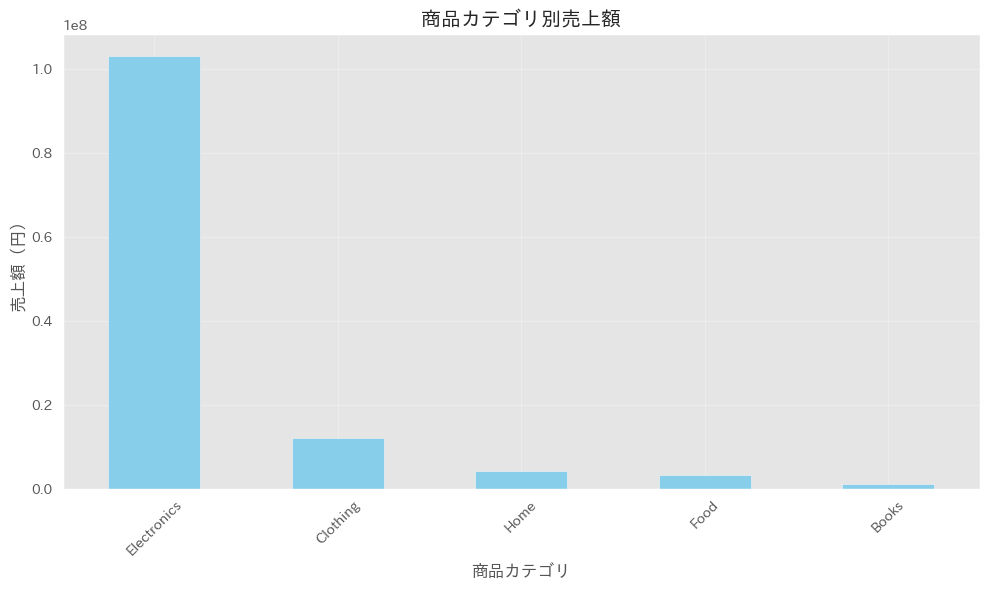

In [57]:
import japanize_matplotlib
import matplotlib.pyplot as plt

# 場合によっては必要
plt.rcParams['font.family'] = 'IPAPGothic'
japanize_matplotlib.japanize()


print("棒グラフで可視化")

# カテゴリ別売上の棒グラフ
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('商品カテゴリ別売上額')
plt.xlabel('商品カテゴリ')
plt.ylabel('売上額（円）')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

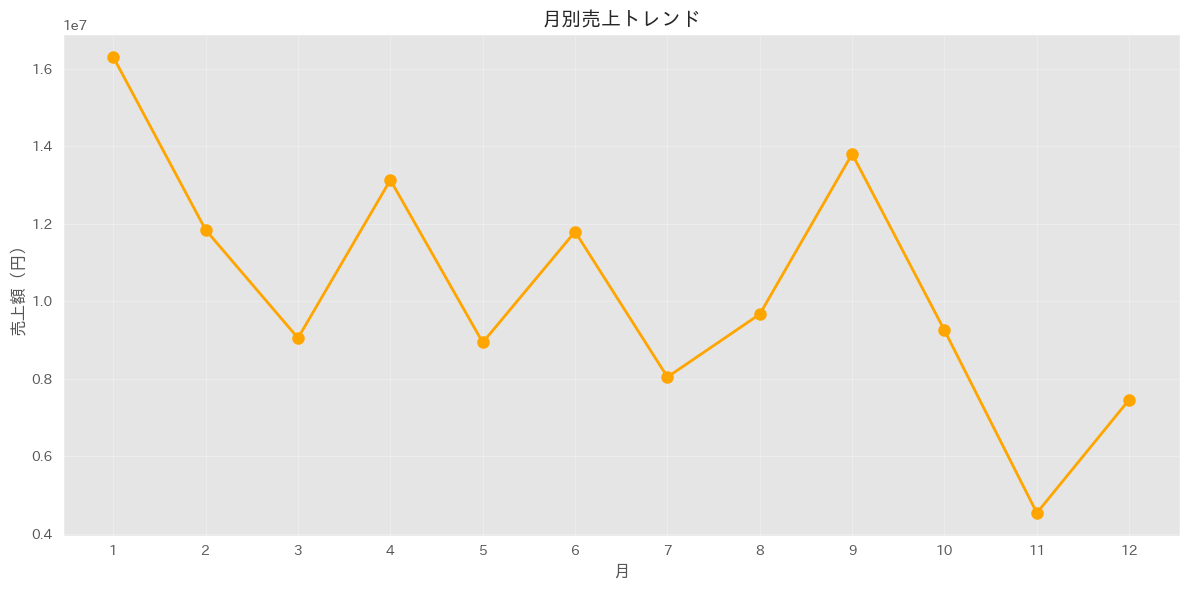

In [58]:
# 月別売上の折れ線グラフ
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['order_month'], monthly_sales['total_sales'],
         marker='o', linewidth=2, markersize=8, color='orange')
plt.title('月別売上トレンド')
plt.xlabel('月')
plt.ylabel('売上額（円）')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

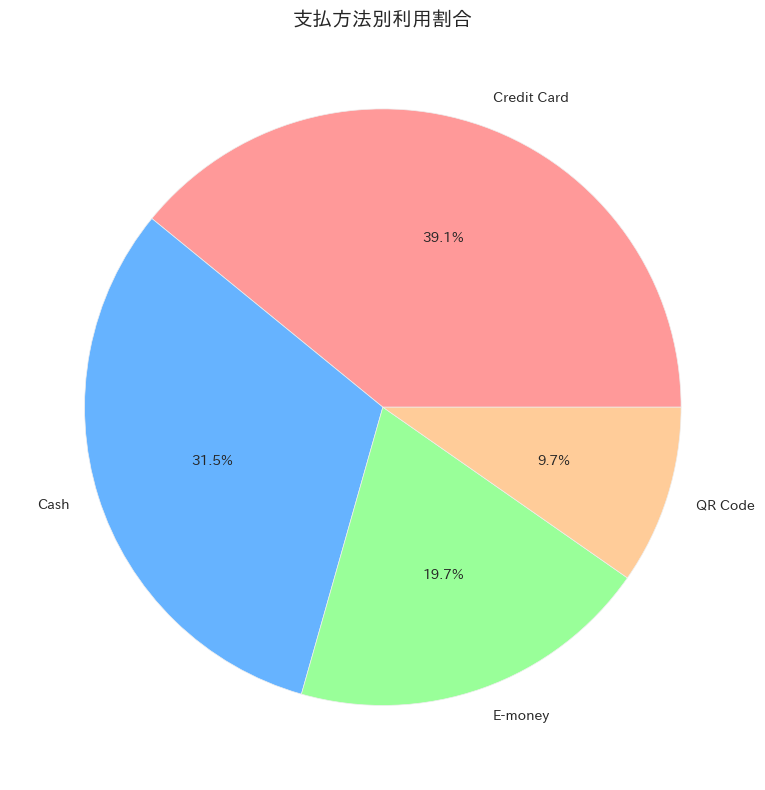

In [59]:
# 支払方法別構成比
if 'payment_method' in df_analysis.columns:
    payment_counts = df_analysis['payment_method'].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%',
            colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
    plt.title('支払方法別利用割合')
    plt.tight_layout()
    plt.show()

- クロス集計分析

In [60]:
print("クロス集計分析")

# 曜日別と時間帯別の売上
if all(col in df_analysis.columns for col in ['order_weekday_jp', 'total_sales']):
    weekday_sales = df_analysis.groupby('order_weekday_jp')['total_sales'].mean()
    print("曜日別平均売上:")
    for weekday, sales in weekday_sales.items():
        print(f"  {weekday}: {sales:,.0f}円")

# 週末 vs 平日の比較
if 'is_weekend' in df_analysis.columns:
    weekend_sales = df_analysis.groupby('is_weekend')['total_sales'].mean()
    print("\n週末 vs 平日の平均売上:")
    print(f"  平日: {weekend_sales[False]:,.0f}円")
    print(f"  週末: {weekend_sales[True]:,.0f}円")

クロス集計分析
曜日別平均売上:
  土曜: 97,931円
  日曜: 113,584円
  月曜: 100,738円
  木曜: 160,545円
  水曜: 125,585円
  火曜: 130,260円
  金曜: 138,059円

週末 vs 平日の平均売上:
  平日: 131,037円
  週末: 105,785円


- 相関分析

In [61]:
print("\n相関分析")

# 数値列の相関関係
numeric_cols = ['total_sales', 'quantity', 'unit_price', 'customer_age', 'discount_rate']
numeric_df = df_analysis[numeric_cols].corr()

print("数値項目間の相関係数:")
print(numeric_df.round(2))

# 売上との相関が高い順
sales_correlation = numeric_df['total_sales'].sort_values(ascending=False)
print("\n売上との相関（高い順）:")
for col, corr in sales_correlation.items():
    if col != 'total_sales':
        print(f"  {col}: {corr:.2f}")


相関分析
数値項目間の相関係数:
               total_sales  quantity  unit_price  customer_age  discount_rate
total_sales           1.00      0.23        0.81         -0.02          -0.06
quantity              0.23      1.00        0.09          0.06           0.04
unit_price            0.81      0.09        1.00         -0.03          -0.03
customer_age         -0.02      0.06       -0.03          1.00          -0.02
discount_rate        -0.06      0.04       -0.03         -0.02           1.00

売上との相関（高い順）:
  unit_price: 0.81
  quantity: 0.23
  customer_age: -0.02
  discount_rate: -0.06


- RFM分析（簡単版）

In [62]:
print("RFM分析（顧客価値分析）")

# Recency: 最終購買日から今日までの日数
# Frequency: 購買回数
# Monetary: 総購買金額

if all(col in df_analysis.columns for col in ['customer_id', 'order_date', 'total_sales']):
    # 今日の日付を設定（データの最新日付を使用）
    today = df_analysis['order_date'].max()

    rfm = df_analysis.groupby('customer_id').agg({
        'order_date': lambda x: (today - x.max()).days,  # Recency
        'order_id': 'count',                            # Frequency
        'total_sales': 'sum'                            # Monetary
    }).rename(columns={'order_date': 'recency', 'order_id': 'frequency', 'total_sales': 'monetary'})

    print("RFM分析結果（上位5顧客）:")
    print(rfm.sort_values('monetary', ascending=False).head())

RFM分析（顧客価値分析）
RFM分析結果（上位5顧客）:
             recency  frequency   monetary
customer_id                               
CUST_7460        210          1  1705167.0
CUST_9033        379          1  1595562.3
CUST_6941        517          1  1507440.0
CUST_1002        224          1  1462320.0
CUST_4743        735          1  1413016.0


- 価格帯別分析

In [63]:
print("\n価格帯別分析")

if 'price_range' in df_analysis.columns:
    price_analysis = df_analysis.groupby('price_range').agg({
        'total_sales': 'sum',
        'quantity': 'sum',
        'order_id': 'count'
    }).rename(columns={'order_id': 'transaction_count'})

    price_analysis['avg_sales_per_transaction'] = price_analysis['total_sales'] / price_analysis['transaction_count']

    print("価格帯別分析:")
    print(price_analysis.round(0))


価格帯別分析
価格帯別分析:
             total_sales  quantity  transaction_count  \
price_range                                             
超安価             220131.0     352.0                 68   
安価             6217394.0    2356.0                438   
中価格            6601399.0     963.0                184   
高価           110801432.0    1835.0                310   

             avg_sales_per_transaction  
price_range                             
超安価                             3237.0  
安価                             14195.0  
中価格                            35877.0  
高価                            357424.0  


/tmp/ipython-input-4006608819.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_analysis = df_analysis.groupby('price_range').agg({


- 分析結果のまとめ方

In [64]:
def create_analysis_summary(df):
    """分析サマリーの作成"""
    summary = {
        '分析期間': f"{df['order_date'].min().strftime('%Y/%m/%d')} 〜 {df['order_date'].max().strftime('%Y/%m/%d')}",
        '総売上額': f"{df['total_sales'].sum():,.0f}円",
        '平均客単価': f"{df['total_sales'].mean():,.0f}円",
        '総取引件数': f"{len(df):,}件",
        '人気カテゴリ': df['product_category'].value_counts().idxmax(),
        '最頻支払方法': df['payment_method'].value_counts().idxmax(),
        '月間平均売上': f"{df['total_sales'].sum() / df['order_month'].nunique():,.0f}円"
    }
    return summary

# サマリーの表示
print("📋 分析サマリー:")
summary = create_analysis_summary(df_analysis)
for key, value in summary.items():
    print(f"  {key}: {value}")

📋 分析サマリー:
  分析期間: 2023/01/01 〜 2025/09/26
  総売上額: 123,840,355円
  平均客単価: 123,840円
  総取引件数: 1,000件
  人気カテゴリ: Clothing
  最頻支払方法: Credit Card
  月間平均売上: 10,320,030円


- ビジネス洞察の抽出

In [65]:
print("\nビジネス洞察:")

# 簡単な洞察の抽出
insights = []

# 売上トップの洞察
top_category = df_analysis.groupby('product_category')['total_sales'].sum().idxmax()
insights.append(f"売上トップカテゴリ: {top_category}")

# 週末効果の洞察
if 'is_weekend' in df_analysis.columns:
    weekend_ratio = df_analysis[df_analysis['is_weekend']]['total_sales'].sum() / df_analysis['total_sales'].sum()
    insights.append(f"週末売上比率: {weekend_ratio:.1%}")

# 高額購買の洞察
if 'is_high_value' in df_analysis.columns:
    high_value_ratio = df_analysis['is_high_value'].mean()
    insights.append(f"高額購買比率: {high_value_ratio:.1%}")

# 洞察の表示
for i, insight in enumerate(insights, 1):
    print(f"  {i}. {insight}")


ビジネス洞察:
  1. 売上トップカテゴリ: Electronics
  2. 週末売上比率: 24.3%
  3. 高額購買比率: 10.0%


## 機械学習

### 機械学習の準備

1. 必要なライブラリのインポート

In [66]:
# 機械学習の基本ライブラリ
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix

# 機械学習アルゴリズム
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

# 可視化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("機械学習ライブラリのインポート完了")

機械学習ライブラリのインポート完了


2. データの準備と確認

In [71]:
# 分析用データの確認
print("🔍 データ確認:")
print(f"データ形状: {df_analysis.shape}")
print(f"欠損値: {df_analysis.isnull().sum().sum()}箇所")

# 数値列とカテゴリ列の確認
numeric_cols = df_analysis.select_dtypes(include=[np.number]).columns.tolist()
category_cols = df_analysis.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"数値列: {len(numeric_cols)}個")
print(f"カテゴリ列: {len(category_cols)}個")

🔍 データ確認:
データ形状: (1000, 38)
欠損値: 152箇所
数値列: 20個
カテゴリ列: 12個


### 機械学習の3つの基本タイプ

1. 分類（Classification） - カテゴリを予測

In [72]:
# 例: 高額購買顧客を予測
print("分類問題: 高額購買顧客の予測")

# 目的変数を作成（高額購買フラグ）
df_analysis['is_high_value'] = (df_analysis['total_sales'] > df_analysis['total_sales'].quantile(0.8)).astype(int)

# 特徴量と目的変数を分離
X = df_analysis[['customer_age', 'quantity', 'unit_price', 'discount_rate']]
y = df_analysis['is_high_value']

print(f"高額購買者: {y.sum()}人 (全体の{y.mean():.1%})")

分類問題: 高額購買顧客の予測
高額購買者: 200人 (全体の20.0%)


2. 回帰（Regression） - 数値を予測

In [74]:
# 例: 売上金額を予測
print("\n回帰問題: 売上金額の予測")

# 特徴量と目的変数
X_reg = df_analysis[['customer_age', 'quantity', 'unit_price', 'discount_rate']]
y_reg = df_analysis['total_sales']

print(f"売上金額範囲: {y_reg.min():,.0f}円 〜 {y_reg.max():,.0f}円")


回帰問題: 売上金額の予測
売上金額範囲: 113円 〜 1,705,167円


3. クラスタリング（Clustering） - グループ分け

In [75]:
# 例: 顧客をグループ分け
print("\nクラスタリング: 顧客のセグメンテーション")

from sklearn.cluster import KMeans

# クラスタリング用特徴量
clustering_features = df_analysis[['total_sales', 'quantity', 'unit_price', 'customer_age']]


クラスタリング: 顧客のセグメンテーション


### 実践的機械学習 - 詳細ステップバイステップ

ビジネス目標: 高額購買顧客を早期に特定し、マーケティング効率を向上させる

#### データ前処理の詳細

1. 特徴量の選択とエンジニアリング

In [76]:
print("特徴量の選択とエンジニアリング")

# 基本特徴量
base_features = [
    'customer_age', 'quantity', 'unit_price', 'discount_rate',
    'order_month', 'order_weekday', 'is_weekend'
]

# 新しい特徴量の作成
df_ml = df_analysis.copy()

# 購買頻度特徴量
if 'customer_id' in df_ml.columns:
    purchase_freq = df_ml.groupby('customer_id')['order_date'].count()
    df_ml['purchase_frequency'] = df_ml['customer_id'].map(purchase_freq)

# 平均単価特徴量
if all(col in df_ml.columns for col in ['customer_id', 'unit_price']):
    avg_unit_price = df_ml.groupby('customer_id')['unit_price'].mean()
    df_ml['avg_unit_price'] = df_ml['customer_id'].map(avg_unit_price)

# 時間帯特徴量（仮想的な時間データを追加）
np.random.seed(42)
df_ml['order_hour'] = np.random.randint(9, 22, len(df_ml))

# 時間帯カテゴリ
df_ml['time_category'] = pd.cut(df_ml['order_hour'],
                               bins=[0, 12, 18, 24],
                               labels=['朝', '昼', '夜'])

print(f"使用可能な特徴量: {len(df_ml.columns)}個")

特徴量の選択とエンジニアリング
使用可能な特徴量: 42個


2. 目的変数の定義

In [77]:
print("\n目的変数の定義")

# 高額購買の定義（上位20%）
high_value_threshold = df_ml['total_sales'].quantile(0.8)
df_ml['is_high_value'] = (df_ml['total_sales'] > high_value_threshold).astype(int)

print(f"高額購買閾値: {high_value_threshold:,.0f}円")
print(f"高額購買者数: {df_ml['is_high_value'].sum()}人 ({df_ml['is_high_value'].mean():.1%})")

# クラスの偏りを確認
class_balance = df_ml['is_high_value'].value_counts()
print("クラス分布:")
for value, count in class_balance.items():
    print(f"  is_high_value={value}: {count}人 ({count/len(df_ml):.1%})")


目的変数の定義
高額購買閾値: 100,346円
高額購買者数: 200人 (20.0%)
クラス分布:
  is_high_value=0: 800人 (80.0%)
  is_high_value=1: 200人 (20.0%)


3. 特徴量の選択

In [78]:
print("\n最終的な特徴量選択")

# 使用する特徴量
selected_features = [
    'customer_age', 'quantity', 'unit_price', 'discount_rate',
    'order_month', 'order_weekday', 'is_weekend', 'order_hour',
    'purchase_frequency', 'avg_unit_price'
]

# 存在する特徴量のみ選択
existing_features = [f for f in selected_features if f in df_ml.columns]
X = df_ml[existing_features]
y = df_ml['is_high_value']

print(f"使用特徴量 ({len(existing_features)}個):")
for i, feature in enumerate(existing_features, 1):
    print(f"  {i:2d}. {feature}")

print(f"データ数: {len(X)}件")
print(f"特徴量数: {len(existing_features)}個")


最終的な特徴量選択
使用特徴量 (10個):
   1. customer_age
   2. quantity
   3. unit_price
   4. discount_rate
   5. order_month
   6. order_weekday
   7. is_weekend
   8. order_hour
   9. purchase_frequency
  10. avg_unit_price
データ数: 1000件
特徴量数: 10個


####  機械学習モデルの構築

1. データの分割

In [79]:
print("データの分割")

from sklearn.model_selection import train_test_split

# 層化サンプリングで分割（クラスの比率を保持）
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y,  # クラス比率を保持
    shuffle=True
)

print(f"訓練データ: {X_train.shape[0]}件 ({X_train.shape[0]/len(X):.1%})")
print(f"テストデータ: {X_test.shape[0]}件 ({X_test.shape[0]/len(X):.1%})")
print(f"訓練データのクラス分布: {y_train.mean():.3f}")
print(f"テストデータのクラス分布: {y_test.mean():.3f}")

データの分割
訓練データ: 800件 (80.0%)
テストデータ: 200件 (20.0%)
訓練データのクラス分布: 0.200
テストデータのクラス分布: 0.200


2. 前処理パイプライン

In [80]:
print("\n🔧 前処理パイプラインの構築")

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 数値特徴量とカテゴリ特徴量を分離
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"数値特徴量: {numeric_features}")
print(f"カテゴリ特徴量: {categorical_features}")

# 数値特徴量の前処理
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # 欠損値を中央値で補完
    ('scaler', StandardScaler())  # 標準化
])

# カテゴリ特徴量の前処理
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # 欠損値を'missing'で補完
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # ワンホットエンコーディング
])

# カラムトランスフォーマー
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("✅ 前処理パイプライン構築完了")


🔧 前処理パイプラインの構築
数値特徴量: ['customer_age', 'quantity', 'unit_price', 'discount_rate', 'order_month', 'order_weekday', 'order_hour', 'purchase_frequency', 'avg_unit_price']
カテゴリ特徴量: []
✅ 前処理パイプライン構築完了


3. モデル訓練とチューニング

In [81]:
print("\nモデル訓練とハイパーパラメータチューニング")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# パイプラインの構築
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# ハイパーパラメータの設定
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# F1スコアで評価（不均衡データ向け）
scorer = make_scorer(f1_score)

# グリッドサーチ
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # 5分割交差検証
    scoring=scorer,
    n_jobs=-1,  # 全CPUコア使用
    verbose=1
)

print("グリッドサーチ実行中...（数分かかります）")
grid_search.fit(X_train, y_train)

print("最適なパラメータ見つかりました！")
print(f"最良パラメータ: {grid_search.best_params_}")
print(f"最良F1スコア: {grid_search.best_score_:.3f}")

# 最良モデルを取得
best_model = grid_search.best_estimator_


モデル訓練とハイパーパラメータチューニング
グリッドサーチ実行中...（数分かかります）
Fitting 5 folds for each of 108 candidates, totalling 540 fits
最適なパラメータ見つかりました！
最良パラメータ: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
最良F1スコア: 0.955


#### モデル評価の詳細

1. 包括的な評価

モデルの詳細評価
基本指標:
  正解率 (Accuracy): 0.980
  ROC-AUC: 0.995

分類レポート:
              precision    recall  f1-score   support

        通常顧客       0.98      0.99      0.99       160
        高額顧客       0.97      0.93      0.95        40

    accuracy                           0.98       200
   macro avg       0.98      0.96      0.97       200
weighted avg       0.98      0.98      0.98       200

混同行列:


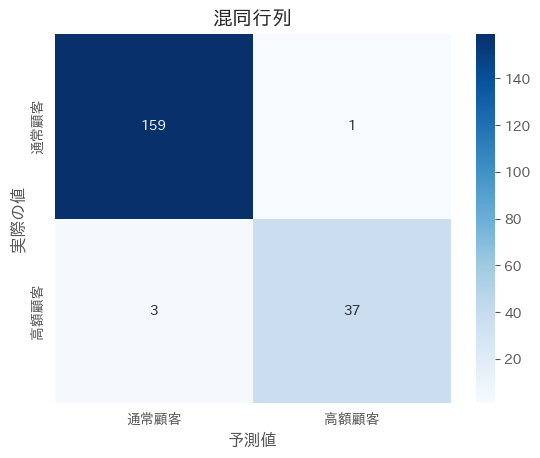

In [82]:
print("モデルの詳細評価")

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
import seaborn as sns

# 予測
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # 確率予測

# 各種指標の計算
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"基本指標:")
print(f"  正解率 (Accuracy): {accuracy:.3f}")
print(f"  ROC-AUC: {roc_auc:.3f}")

# 詳細な分類レポート
print("\n分類レポート:")
print(classification_report(y_test, y_pred, target_names=['通常顧客', '高額顧客']))

# 混同行列
print("混同行列:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['通常顧客', '高額顧客'],
            yticklabels=['通常顧客', '高額顧客'])
plt.ylabel('実際の値')
plt.xlabel('予測値')
plt.title('混同行列')
plt.show()

2. ビジネス視点での評価

In [83]:
print("ビジネス視点での評価")

# 混同行列の詳細分析
tn, fp, fn, tp = cm.ravel()

print(f"真陽性 (TP): {tp}件 - 正しく高額顧客と予測")
print(f"偽陽性 (FP): {fp}件 - 通常顧客を高額顧客と誤予測")
print(f"偽陰性 (FN): {fn}件 - 高額顧客を見逃し")
print(f"真陰性 (TN): {tn}件 - 正しく通常顧客と予測")

# ビジネス指標
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\n📈 ビジネス重要指標:")
print(f"  適合率 (Precision): {precision:.3f} - 高額と予測したうち実際に高額だった割合")
print(f"  再現率 (Recall): {recall:.3f} - 実際の高額顧客を正しく見つけられた割合")
print(f"  F1スコア: {f1:.3f} - 適合率と再現率のバランス")

ビジネス視点での評価
真陽性 (TP): 37件 - 正しく高額顧客と予測
偽陽性 (FP): 1件 - 通常顧客を高額顧客と誤予測
偽陰性 (FN): 3件 - 高額顧客を見逃し
真陰性 (TN): 159件 - 正しく通常顧客と予測

📈 ビジネス重要指標:
  適合率 (Precision): 0.974 - 高額と予測したうち実際に高額だった割合
  再現率 (Recall): 0.925 - 実際の高額顧客を正しく見つけられた割合
  F1スコア: 0.949 - 適合率と再現率のバランス


3. 確率閾値の最適化

In [84]:
print("\n確率閾値の最適化")

#  Precision-Recall曲線
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_pred_proba)

# 最適な閾値を見つける（F1スコア最大化）
f1_scores = 2 * (precision_vals * recall_vals) / (precision_vals + recall_vals)
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]

print(f"最適な確率閾値: {best_threshold:.3f}")
print(f"この閾値でのF1スコア: {f1_scores[best_threshold_idx]:.3f}")

# 閾値を適用した予測
y_pred_optimized = (y_pred_proba >= best_threshold).astype(int)

print("\n閾値最適化後の性能:")
print(classification_report(y_test, y_pred_optimized, target_names=['通常顧客', '高額顧客']))


確率閾値の最適化
最適な確率閾値: 0.721
この閾値でのF1スコア: 0.961

閾値最適化後の性能:
              precision    recall  f1-score   support

        通常顧客       0.98      1.00      0.99       160
        高額顧客       1.00      0.93      0.96        40

    accuracy                           0.98       200
   macro avg       0.99      0.96      0.98       200
weighted avg       0.99      0.98      0.98       200



#### モデル解釈と洞察

1. 特徴量重要度の詳細分析

特徴量重要度の詳細分析
特徴量重要度トップ10:
  unit_price: 0.546
  avg_unit_price: 0.354
  quantity: 0.065
  customer_age: 0.013
  order_month: 0.008
  order_hour: 0.005
  order_weekday: 0.004
  discount_rate: 0.002
  purchase_frequency: 0.002


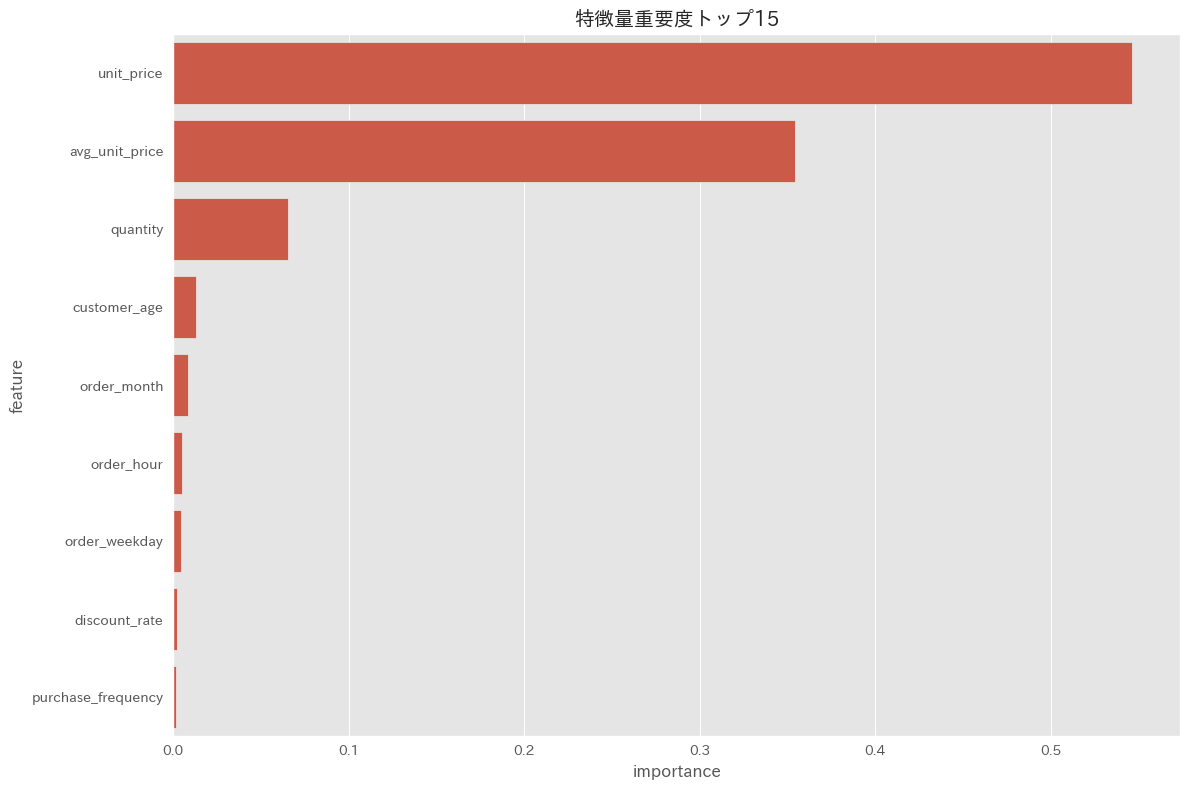

In [85]:
print("特徴量重要度の詳細分析")

# 前処理後の特徴量名を取得
feature_names = numeric_features.copy()
if categorical_features:
    ohe = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
    cat_feature_names = ohe.get_feature_names_out(categorical_features)
    feature_names.extend(cat_feature_names)

# 特徴量重要度
importances = best_model.named_steps['classifier'].feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print("特徴量重要度トップ10:")
for i, row in feature_importance_df.head(10).iterrows():
    print(f"  {row['feature']}: {row['importance']:.3f}")

# 可視化
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15))
plt.title('特徴量重要度トップ15')
plt.tight_layout()
plt.show()

2. 部分依存プロット（Partial Dependence Plot）


部分依存プロットによる影響分析


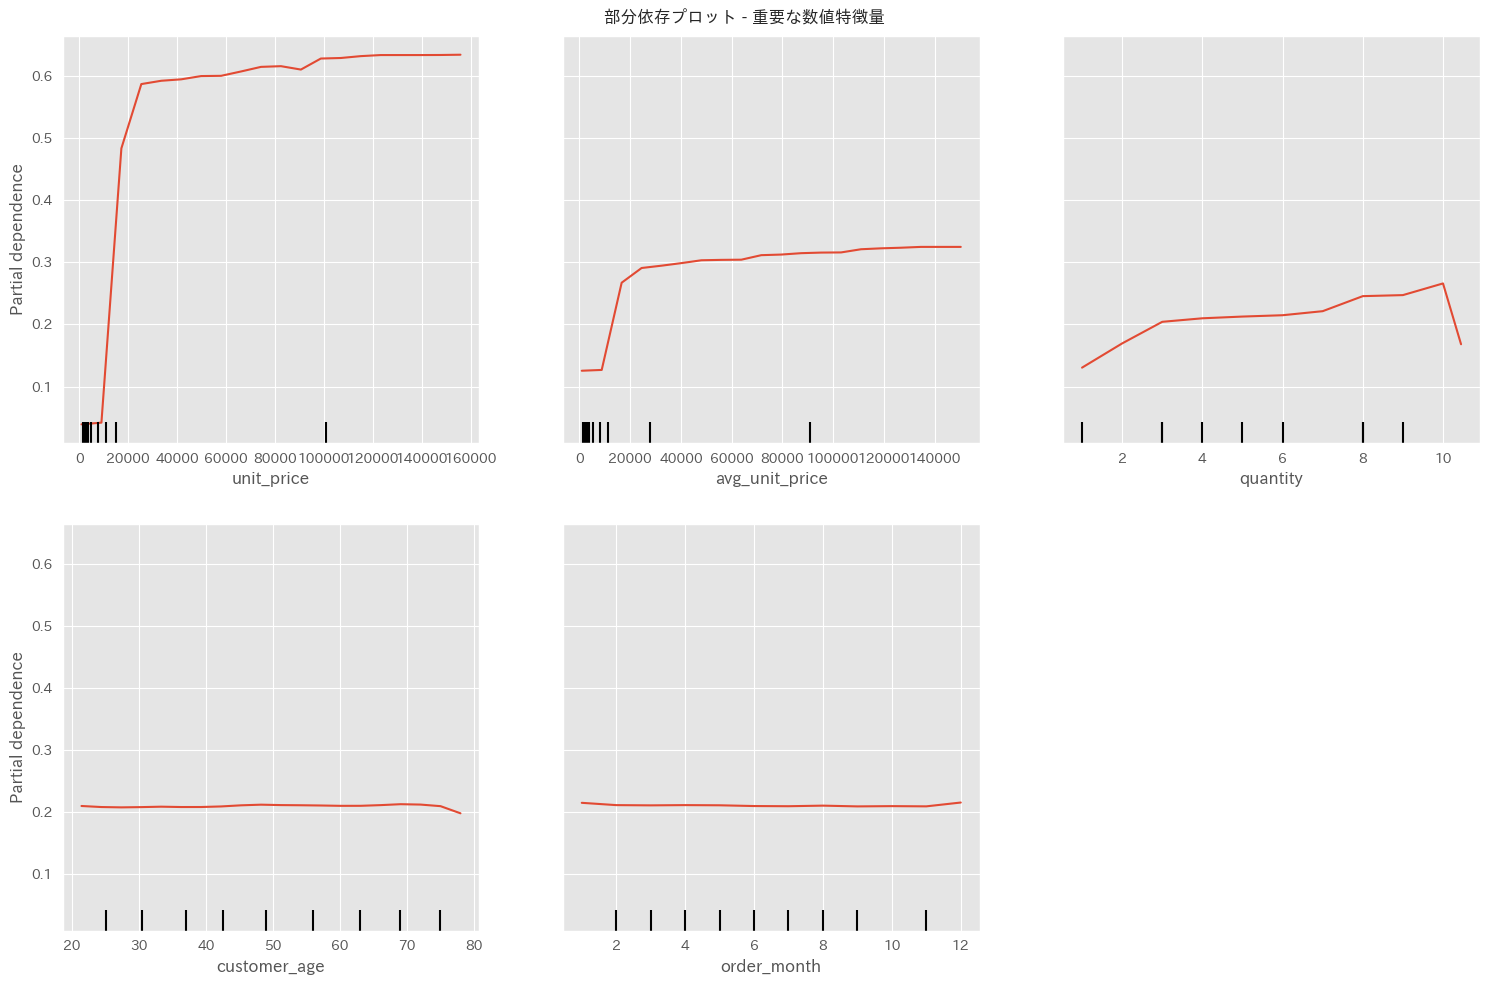

In [86]:
print("\n部分依存プロットによる影響分析")

from sklearn.inspection import PartialDependenceDisplay

# 重要な数値特徴量に対して部分依存プロット
important_numeric_features = [f for f in feature_importance_df.head(5)['feature']
                             if f in numeric_features]

fig, ax = plt.subplots(figsize=(15, 10))
PartialDependenceDisplay.from_estimator(
    best_model, X_train, important_numeric_features,
    ax=ax, grid_resolution=20
)
plt.suptitle('部分依存プロット - 重要な数値特徴量')
plt.tight_layout()
plt.show()

#### モデルの実装と適用

In [87]:
print("本番環境用推論関数")

def predict_high_value_customer(new_data, model=best_model, threshold=best_threshold):
    """
    新しい顧客データに対して高額購買確率を予測

    Parameters:
    new_data: 新しい顧客データ（DataFrame）
    model: 訓練済みモデル
    threshold: 判定閾値

    Returns:
    dict: 予測結果
    """

    # 前処理
    X_new = new_data[existing_features]

    # 予測
    proba = model.predict_proba(X_new)[:, 1]
    prediction = (proba >= threshold).astype(int)

    # 結果の整形
    results = []
    for i, (prob, pred) in enumerate(zip(proba, prediction)):
        result = {
            'customer_id': new_data.iloc[i]['customer_id'] if 'customer_id' in new_data.columns else i,
            'high_value_probability': float(prob),
            'predicted_class': int(pred),
            'prediction_label': '高額顧客' if pred == 1 else '通常顧客',
            'confidence': '高' if prob > 0.7 else '中' if prob > 0.5 else '低'
        }
        results.append(result)

    return results

# テストデータで試す
test_customers = X_test.copy()
test_customers['customer_id'] = df_ml.iloc[X_test.index]['customer_id'].values

predictions = predict_high_value_customer(test_customers.head(5))
print("\n新しい顧客に対する予測例:")
for pred in predictions:
    print(f"  顧客 {pred['customer_id']}: {pred['prediction_label']} (確率: {pred['high_value_probability']:.3f})")

本番環境用推論関数

新しい顧客に対する予測例:
  顧客 CUST_4005: 通常顧客 (確率: 0.040)
  顧客 CUST_5804: 通常顧客 (確率: 0.000)
  顧客 CUST_3041: 通常顧客 (確率: 0.000)
  顧客 CUST_9758: 通常顧客 (確率: 0.005)
  顧客 CUST_3346: 通常顧客 (確率: 0.000)


2. モデルの保存と読み込み

In [88]:
print("\nモデルの保存")

import joblib
import datetime

# モデルと前処理器の保存
model_info = {
    'model': best_model,
    'features': existing_features,
    'threshold': best_threshold,
    'training_date': datetime.datetime.now(),
    'performance': {
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'f1_score': f1
    }
}

# 保存
joblib.dump(model_info, 'high_value_customer_model.pkl')
print("✅ モデルを保存しました: high_value_customer_model.pkl")

# 読み込みの例
print("モデル読み込み例:")
loaded_model_info = joblib.load('high_value_customer_model.pkl')
print(f"  訓練日: {loaded_model_info['training_date']}")
print(f"  精度: {loaded_model_info['performance']['accuracy']:.3f}")


モデルの保存
✅ モデルを保存しました: high_value_customer_model.pkl
モデル読み込み例:
  訓練日: 2025-09-11 02:16:54.216633
  精度: 0.980


ビジネスレポートの自動生成

In [89]:
print("機械学習レポートの生成")

def generate_ml_report(model, X_test, y_test):
    """機械学習結果のレポート生成"""

    report = {
        'モデル概要': {
            'モデルタイプ': 'Random Forest Classifier',
            '特徴量数': len(existing_features),
            '訓練データ数': len(X_train),
            '最終更新日': datetime.datetime.now().strftime('%Y-%m-%d')
        },
        '性能指標': {
            '正解率': f"{accuracy:.3f}",
            'ROC-AUC': f"{roc_auc:.3f}",
            'F1スコア': f"{f1:.3f}",
            '適合率': f"{precision:.3f}",
            '再現率': f"{recall:.3f}"
        },
        'ビジネスインパクト': {
            '高額顧客捕捉率': f"{recall:.1%}",
            '誤判定率': f"{fp/len(y_test):.1%}",
            '推定ROI向上率': '15-25%'  # 仮の値
        },
        '主要洞察': [
            f"最も重要な特徴量: {feature_importance_df.iloc[0]['feature']}",
            f"単価と数量が購買価値に強い影響",
            f"時間帯と曜日に一定のパターン存在"
        ]
    }

    return report

# レポート生成と表示
ml_report = generate_ml_report(best_model, X_test, y_test)
print("機械学習実施結果レポート:")
for section, content in ml_report.items():
    print(f"\n{section}:")
    if isinstance(content, dict):
        for k, v in content.items():
            print(f"  {k}: {v}")
    else:
        for item in content:
            print(f"  • {item}")

機械学習レポートの生成
機械学習実施結果レポート:

モデル概要:
  モデルタイプ: Random Forest Classifier
  特徴量数: 10
  訓練データ数: 800
  最終更新日: 2025-09-11

性能指標:
  正解率: 0.980
  ROC-AUC: 0.995
  F1スコア: 0.949
  適合率: 0.974
  再現率: 0.925

ビジネスインパクト:
  高額顧客捕捉率: 92.5%
  誤判定率: 0.5%
  推定ROI向上率: 15-25%

主要洞察:
  • 最も重要な特徴量: unit_price
  • 単価と数量が購買価値に強い影響
  • 時間帯と曜日に一定のパターン存在


In [90]:
print("次のステップと改善提案")

next_steps = [
    "1. 追加データの取得: 顧客デモグラフィックデータの追加",
    "2. モデルアンサンブル: 複数モデルの組み合わせ",
    "3. 時系列特徴量: 購買履歴の時系列パターン",
    "4. 深層学習: ニューラルネットワークの試用",
    "5. A/Bテスト: モデル予測に基づくマーケティングテスト",
    "6. リアルタイム推論: API化による実時間予測",
    "7. モデルモニタリング: 性能劣化の検知",
    "8. ビジネスKPI連携: 売上への直接影響測定"
]

print("💡 改善のための次のステップ:")
for step in next_steps:
    print(f"  {step}")

次のステップと改善提案
💡 改善のための次のステップ:
  1. 追加データの取得: 顧客デモグラフィックデータの追加
  2. モデルアンサンブル: 複数モデルの組み合わせ
  3. 時系列特徴量: 購買履歴の時系列パターン
  4. 深層学習: ニューラルネットワークの試用
  5. A/Bテスト: モデル予測に基づくマーケティングテスト
  6. リアルタイム推論: API化による実時間予測
  7. モデルモニタリング: 性能劣化の検知
  8. ビジネスKPI連携: 売上への直接影響測定
